<a href="https://colab.research.google.com/github/utkarshs75/NYC-Taxi-Data-Analysis/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AB_Capstone/Linear Regression Capstone/NYC Taxi Data.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
data.shape

(1458644, 11)

In [ ]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
# Setting the Parameters for plots
#sns.set_style('darkgrid')
#plt.rcParams['font.size'] = 8
#plt.rcParams['figure.figsize'] = (9, 7)
#sns.set(font_scale=2)
#plt.rcParams['figure.facecolor'] = '#80050001'

In [ ]:
data['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

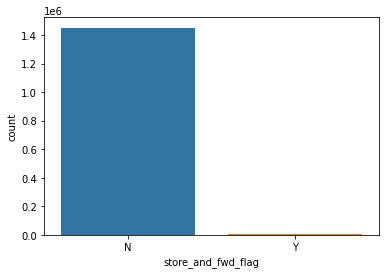

In [ ]:
#plt.figure(figsize=(10, 5))
sns.countplot(x = data['store_and_fwd_flag'])
plt.show()

In [ ]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

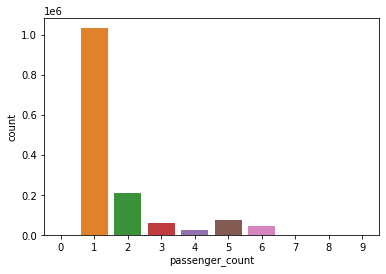

In [ ]:
sns.countplot(x = data['passenger_count'])

In [ ]:
data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

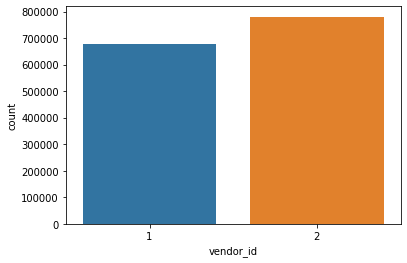

In [ ]:
sns.countplot(x = data['vendor_id'])

In [ ]:
data['distance'] = ((data['pickup_latitude']-data['dropoff_latitude'])**2 + (data['pickup_longitude']-data['dropoff_longitude'])**2)**0.5

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.017680
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.020456
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.059934
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.013438
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.010690


In [ ]:
#plt.scatter(x = data['distance'], y = data['trip_duration'])

In [ ]:
cols = list(data.columns)

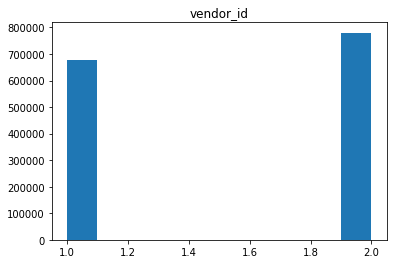

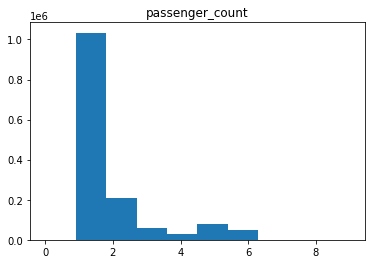

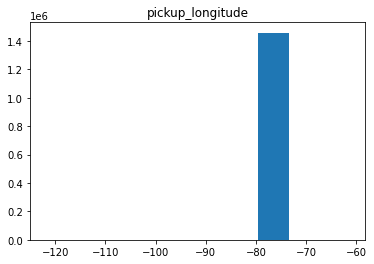

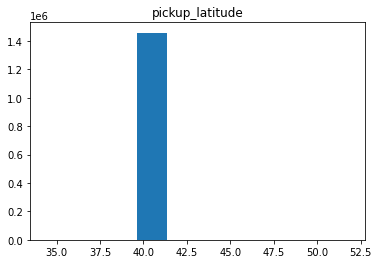

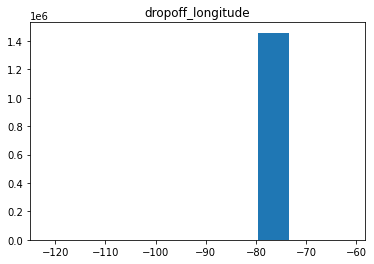

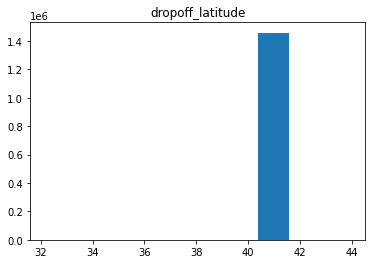

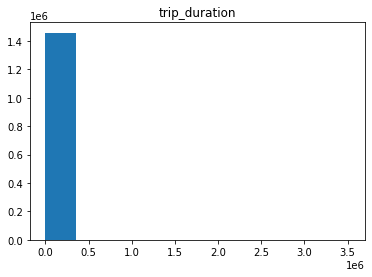

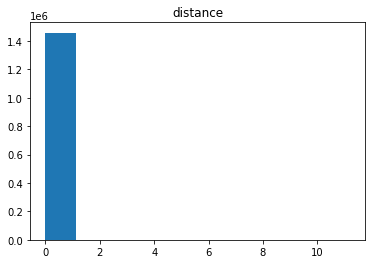

In [ ]:
for i in cols:
  if data[i].dtypes != 'object':
    plt.hist(data[i])
    plt.title(i)
    plt.show()

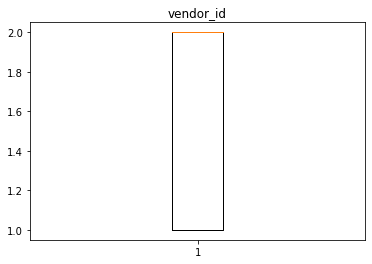

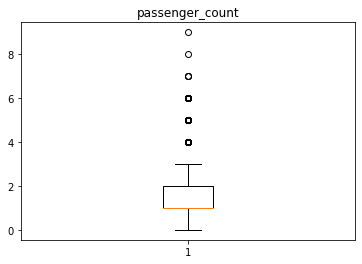

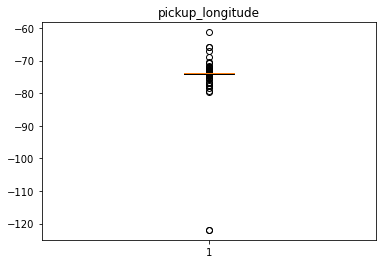

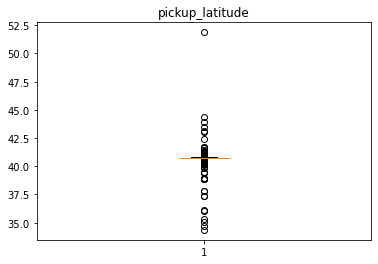

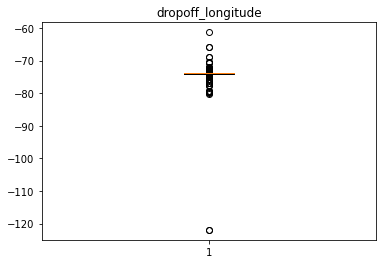

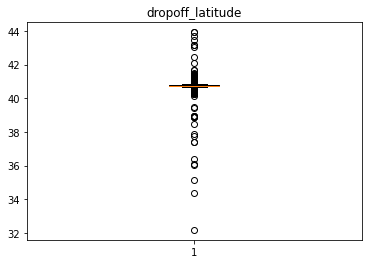

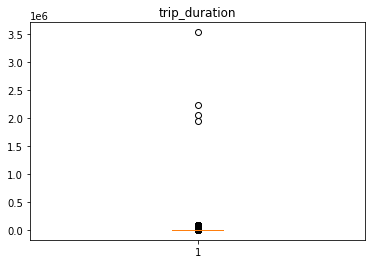

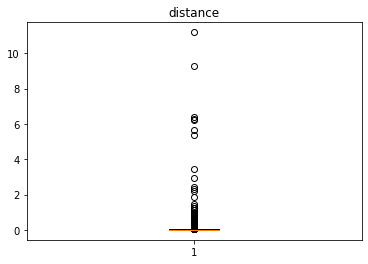

In [ ]:
for i in cols:
  if data[i].dtypes != 'object':
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [ ]:
data.shape

(1458644, 12)

In [ ]:
cols = list(data.columns)
col2 = []
for i in cols:
  if data[i].dtypes != 'object' and i != 'trip_duration':
    col2.append(i)

In [ ]:
col2

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'distance']

In [ ]:
del col2[2:6]#'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',)
#col2.remove('vendor_id')
del col2[:2]
col2

['distance']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
vif_data = pd.DataFrame()
vif_data['feature'] = col2
vif_data['VIF'] = [vif(data[col2].values,i) for i in range(len(col2))]
print(vif_data)


ValueError: ignored

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.017680
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.020456
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.059934
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.013438
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.010690


In [ ]:
d1 = data[data['vendor_id'] == 1]
d2 = data[data['vendor_id'] == 2]

In [ ]:
x1 = d1.loc[:, col2]
x2 = d2.loc[:, col2]
x3 = data.loc[:, col2]
y3 = data.loc[:, 'trip_duration']
y1 = d1.loc[:, 'trip_duration']
y2= d2.loc[:, 'trip_duration']

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,train_size = 0.7, random_state = 1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,train_size = 0.7, random_state = 1)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,train_size = 0.7, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(x_train1, y_train1)

LinearRegression()

In [ ]:
y_pred1 = model.predict(x_test1)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test1, y_pred1)

0.007210278048957908

In [ ]:
model.fit(x_train2, y_train2)

LinearRegression()

In [ ]:
y_pred2 = model.predict(x_test2)
r2_score(y_test2, y_pred2)

0.01590487700891663

In [ ]:
error = pd.DataFrame(columns = {'Actual', 'Predicted'})

error['Actual'] = y_test
error['Predicted'] = y_pred
error['Error'] = error['Actual'] - error['Predicted']
error

,Predicted,Actual,Error
1457636,1274.166881,692,-582.166881
615369,1329.689359,990,-339.689359
491096,843.580890,647,-196.580890
82632,759.393078,278,-481.393078
71403,847.015373,881,33.984627
...,...,...,...
318356,516.570683,395,-121.570683
97497,1294.982454,1070,-224.982454
1355720,809.768881,335,-474.768881
1203741,954.624767,734,-220.624767


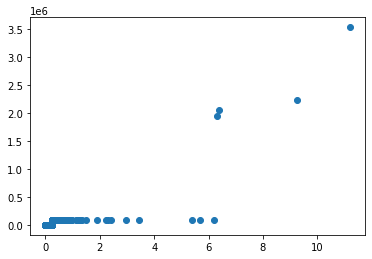

In [ ]:
plt.scatter(x = data['distance'].sort_values(), y = data['trip_duration'].sort_values())